In [1]:
import sys
import seaborn
import matplotlib.pyplot as plt

sys.path.insert(0, './src/')

import af2_analysis
from af2_analysis import analysis
from af2_analysis import docking
from af2_analysis import clustering
print(af2_analysis.__file__)

/home/murail/Documents/Code/af2_analysis/./src/af2_analysis/__init__.py


In [3]:
%matplotlib inline

## Importing Data

In [4]:
my_data = af2_analysis.Data('./src/af2_analysis/test/inputs/beta_amyloid_dimer_cf_1.5.5/', verbose=False)

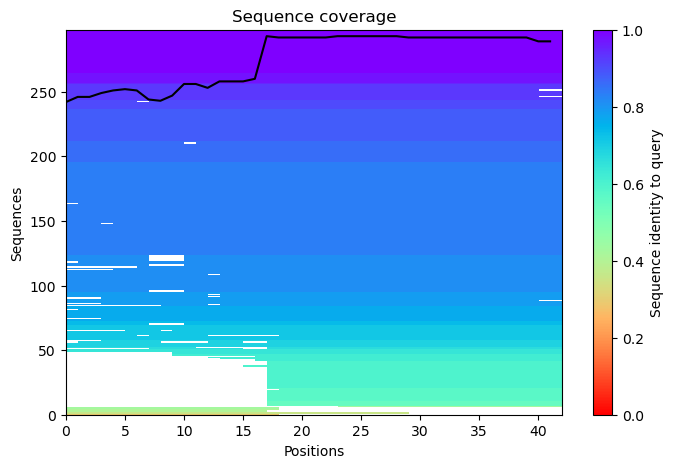

In [5]:
my_data.plot_msa()

## Interactive ploting

In [6]:
my_data.show_plot_info()

IntSlider(value=1, description='model:', max=40, min=1)

Output(layout=Layout(width='95%'))

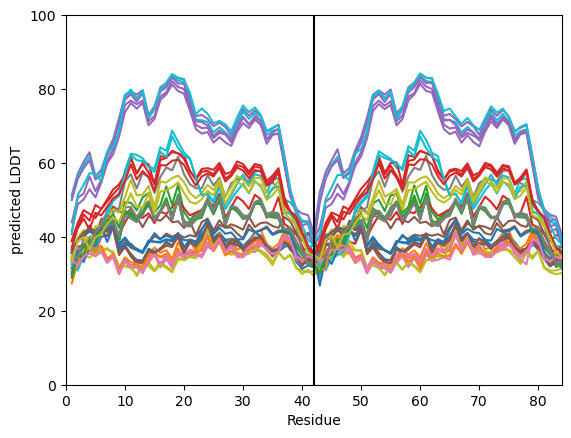

In [7]:
my_data.plot_plddt()
plt.savefig('docs/source/_static/plddt_amyloid.png')

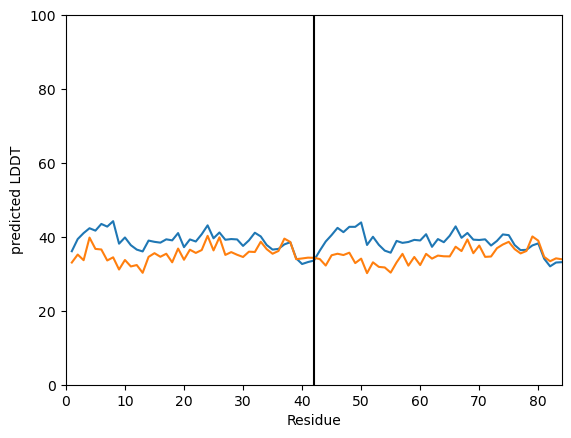

In [8]:
my_data.plot_plddt([0,1])
plt.savefig('docs/source/_static/plddt_amyloid_sel.png')

In [9]:
my_data.chain_length

{'beta_amyloid_dimer_d2fa3_0': [42, 42]}

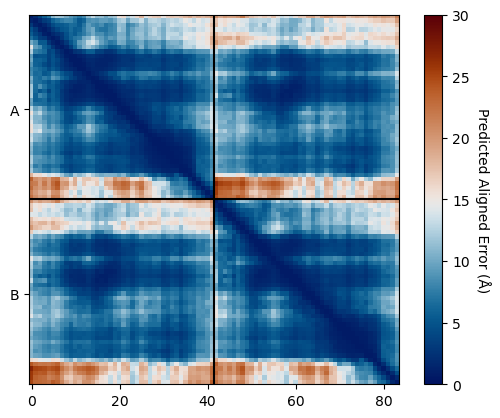

In [10]:
best_model_index = my_data.df['ranking_confidence'].idxmax()
my_data.plot_pae(best_model_index)
plt.savefig('docs/source/_static/PAE_amyloid_best.png')

## Several analysis

In [11]:
my_data.df.columns

Index(['query', 'seed', 'model', 'weight', 'recycle', 'pLDDT', 'pTM', 'ipTM',
       'ranking_confidence', 'pdb', 'relaxed_pdb', 'json'],
      dtype='object')

In [12]:
docking.pae_pep(my_data, verbose=False)

my_data.df.columns

Index(['query', 'seed', 'model', 'weight', 'recycle', 'pLDDT', 'pTM', 'ipTM',
       'ranking_confidence', 'pdb', 'relaxed_pdb', 'json', 'PAE_pep_rec',
       'PAE_rec_pep'],
      dtype='object')

In [13]:
docking.plddt_pep(my_data, verbose=False)
my_data.df.columns

Index(['query', 'seed', 'model', 'weight', 'recycle', 'pLDDT', 'pTM', 'ipTM',
       'ranking_confidence', 'pdb', 'relaxed_pdb', 'json', 'PAE_pep_rec',
       'PAE_rec_pep', 'plddt_pep'],
      dtype='object')

In [14]:
docking.LIS_pep(my_data, verbose=False)
my_data.df.columns

Index(['query', 'seed', 'model', 'weight', 'recycle', 'pLDDT', 'pTM', 'ipTM',
       'ranking_confidence', 'pdb', 'relaxed_pdb', 'json', 'PAE_pep_rec',
       'PAE_rec_pep', 'plddt_pep', 'LIS', 'LIS_rec_pep', 'LIS_pep_rec'],
      dtype='object')

In [15]:
docking.pdockq2_lig(my_data, verbose=False)
my_data.df.columns

Index(['query', 'seed', 'model', 'weight', 'recycle', 'pLDDT', 'pTM', 'ipTM',
       'ranking_confidence', 'pdb', 'relaxed_pdb', 'json', 'PAE_pep_rec',
       'PAE_rec_pep', 'plddt_pep', 'LIS', 'LIS_rec_pep', 'LIS_pep_rec',
       'pdockq2_A', 'pdockq2_B', 'pdockq2_lig'],
      dtype='object')

In [16]:
my_data.df.head(2)

,query,seed,model,weight,recycle,pLDDT,pTM,ipTM,ranking_confidence,pdb,...,json,PAE_pep_rec,PAE_rec_pep,plddt_pep,LIS,LIS_rec_pep,LIS_pep_rec,pdockq2_A,pdockq2_B,pdockq2_lig
0,beta_amyloid_dimer_d2fa3_0,0,1,alphafold2_multimer_v3,9,38.8,0.159,0.0812,0.09676,./src/af2_analysis/test/inputs/beta_amyloid_di...,...,./src/af2_analysis/test/inputs/beta_amyloid_di...,21.026196,20.984252,38.685476,"[[0.44785182119205297, 0.11038825757575756], [...",0.107481,0.110388,0.012064,0.011992,0.011992
1,beta_amyloid_dimer_d2fa3_0,0,2,alphafold2_multimer_v3,16,35.2,0.130,0.0685,0.08080,./src/af2_analysis/test/inputs/beta_amyloid_di...,...,./src/af2_analysis/test/inputs/beta_amyloid_di...,22.760130,22.746667,34.902857,"[[0.4598769470404984, 0.10359090909090911], [0...",0.103333,0.103591,0.010768,0.010624,0.010624


In [17]:
# Compute pdockq
analysis.pdockq(my_data, verbose=False)
# Compute pdockq2
analysis.pdockq2(my_data, verbose=False)

#extract_pae_pep
docking.pae_pep(my_data, verbose=False)
#compute_pdockq2_lig
docking.pdockq2_lig(my_data, verbose=False)
#compute_LIS_pep
docking.LIS_pep(my_data, verbose=False)
#extract_plddt_pep
docking.plddt_pep(my_data, verbose=False)

## Clustering

/home/murail/miniconda3/envs/start/lib/python3.8/site-packages/MDAnalysis/coordinates/base.py:721: UserWarning: Reader has no dt information, set to 1.0 ps
  return self.ts.dt


  0%|          | 0/40 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

/home/murail/miniconda3/envs/start/lib/python3.8/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


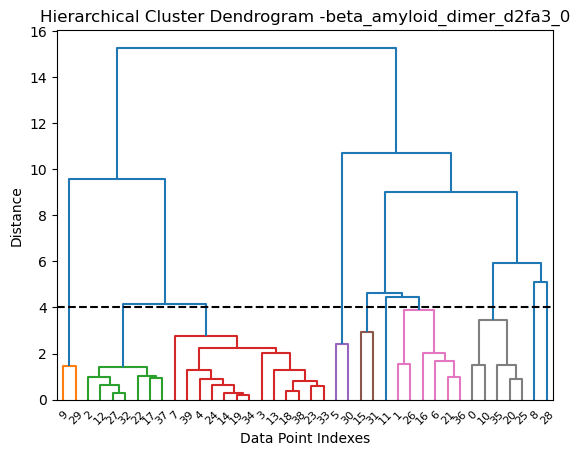

In [18]:
clustering.hierarchical(my_data.df, threshold=4)

In [19]:
my_data.df

,query,seed,model,weight,recycle,pLDDT,pTM,ipTM,ranking_confidence,pdb,...,LIS,LIS_rec_pep,LIS_pep_rec,pdockq2_A,pdockq2_B,pdockq2_lig,pdockq,cluster,MDS 1,MDS 2
0,beta_amyloid_dimer_d2fa3_0,0,1,alphafold2_multimer_v3,9,38.8,0.159,0.0812,0.09676,./src/af2_analysis/test/inputs/beta_amyloid_di...,...,"[[0.44785182119205297, 0.11038825757575756], [...",0.107481,0.110388,0.012064,0.011992,0.011992,0.033217,4,4.976294,-7.608126
1,beta_amyloid_dimer_d2fa3_0,0,2,alphafold2_multimer_v3,16,35.2,0.130,0.0685,0.08080,./src/af2_analysis/test/inputs/beta_amyloid_di...,...,"[[0.4598769470404984, 0.10359090909090911], [0...",0.103333,0.103591,0.010768,0.010624,0.010624,0.020508,3,-1.162616,-9.674423
2,beta_amyloid_dimer_d2fa3_0,0,3,alphafold2_multimer_v3,3,44.5,0.250,0.1610,0.17880,./src/af2_analysis/test/inputs/beta_amyloid_di...,...,"[[0.48629706152433433, 0.08237745098039216], [...",0.084944,0.082377,0.014431,0.014287,0.014287,0.029995,2,-3.749150,4.792547
3,beta_amyloid_dimer_d2fa3_0,0,4,alphafold2_multimer_v3,5,44.2,0.234,0.1580,0.17320,./src/af2_analysis/test/inputs/beta_amyloid_di...,...,"[[0.4926578192252511, 0.10013468013468015], [0...",0.099600,0.100135,0.016365,0.016360,0.016360,0.029711,1,0.522858,5.520341
4,beta_amyloid_dimer_d2fa3_0,0,5,alphafold2_multimer_v3,5,64.2,0.568,0.5410,0.54640,./src/af2_analysis/test/inputs/beta_amyloid_di...,...,"[[0.5450712678169541, 0.41792701625268325], [0...",0.417809,0.417927,0.185380,0.168438,0.168438,0.120942,1,-0.585170,7.227857
5,beta_amyloid_dimer_d2fa3_0,1,1,alphafold2_multimer_v3,14,42.9,0.187,0.1170,0.13100,./src/af2_analysis/test/inputs/beta_amyloid_di...,...,"[[0.4203167574931881, 0.16121004566210048], [0...",0.154424,0.161210,0.016598,0.016607,0.016607,0.028492,5,8.927657,-1.193915
6,beta_amyloid_dimer_d2fa3_0,1,2,alphafold2_multimer_v3,15,35.7,0.134,0.0698,0.08264,./src/af2_analysis/test/inputs/beta_amyloid_di...,...,"[[0.45846071209330874, 0.11254098360655737], [...",0.114333,0.112541,0.011236,0.011501,0.011501,0.022461,3,-1.726121,-8.835821
7,beta_amyloid_dimer_d2fa3_0,1,3,alphafold2_multimer_v3,15,50.2,0.317,0.2390,0.25460,./src/af2_analysis/test/inputs/beta_amyloid_di...,...,"[[0.4854527334851936, 0.1716621863799283], [0....",0.172876,0.171662,0.024454,0.023876,0.023876,0.048451,1,-1.514073,6.065285
8,beta_amyloid_dimer_d2fa3_0,1,4,alphafold2_multimer_v3,48,34.4,0.128,0.0648,0.07744,./src/af2_analysis/test/inputs/beta_amyloid_di...,...,"[[0.4892099135063207, 0.028541666666666687], [...",0.034792,0.028542,0.009833,0.008946,0.008946,0.019804,8,2.386114,-6.973671
9,beta_amyloid_dimer_d2fa3_0,1,5,alphafold2_multimer_v3,12,51.9,0.402,0.3310,0.34520,./src/af2_analysis/test/inputs/beta_amyloid_di...,...,"[[0.4987566666666667, 0.19839321357285428], [0...",0.201414,0.198393,0.029543,0.029643,0.029643,0.071488,6,-10.121384,5.514042


## LIS Score example

In [20]:
my_data_2 = af2_analysis.Data('./src/af2_analysis/test/inputs/fold_2024_07_01_12_14_prot_dna_zn/', verbose=False)

/home/murail/miniconda3/envs/start/lib/python3.8/site-packages/pdb_numpy/format/mmcif.py:146: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  alterloc_array[alterloc_array == b"."] = ""
/home/murail/miniconda3/envs/start/lib/python3.8/site-packages/pdb_numpy/format/mmcif.py:153: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  insertres_array[insertres_array == b"?"] = ""


In [21]:
analysis.LIS_matrix(my_data_2, pae_cutoff=12.0)

  0%|          | 0/5 [00:00<?, ?it/s]

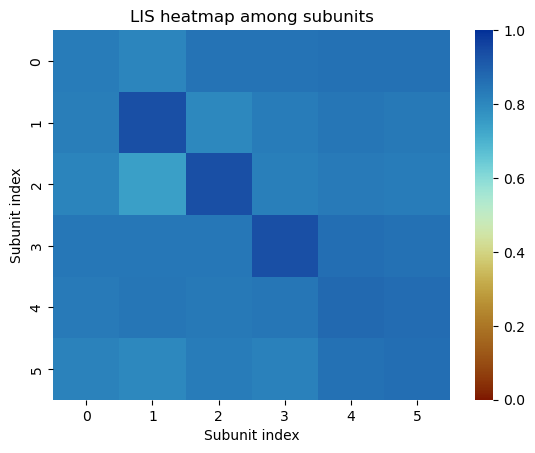

In [22]:
import seaborn as sns
from cmcrameri import cm

ax = sns.heatmap(my_data_2.df.LIS.iloc[0], cmap=cm.roma)
ax.collections[0].set_clim(0,1)  
ax.set_title('LIS heatmap among subunits')
ax.set_xlabel('Subunit index')
ax.set_ylabel('Subunit index')

plt.savefig('docs/source/_static/LIS_prot_dna_zn.png')

In [23]:
for col in ['LIS_rec_pep', 'LIS_pep_rec']:
    print(my_data.df.iloc[0][col])

0.10748148148148148
0.11038825757575756


In [24]:
my_data.df.iloc[0]['LIS']

[[0.44785182119205297, 0.11038825757575756],
 [0.10748148148148148, 0.44471074380165293]]

Here is the PAE matrix used for calculation

(<Figure size 640x480 with 2 Axes>, <Axes: >)

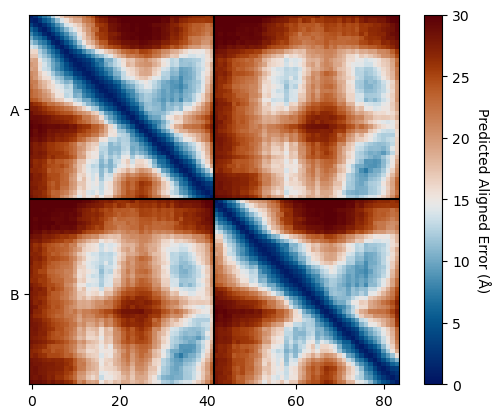

In [25]:
my_data.plot_pae(0)

And here the mask to compute the LIS value based on the PAE matrix.

(83.5, -0.5)

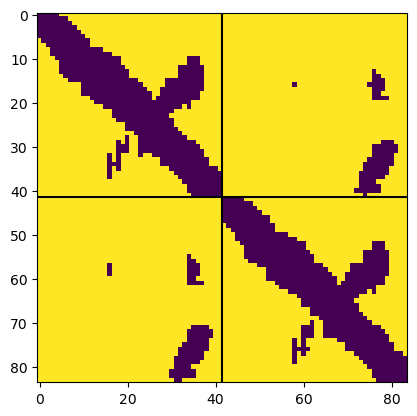

In [26]:
from cmcrameri import cm
import numpy as np
import matplotlib.pyplot as plt

pae_cutoff=12.0
index = 0

row = my_data.df.iloc[index]
res_max = sum(my_data.chain_length[row["query"]])
pae_array = af2_analysis.data.get_pae(my_data.df.iloc[index]['json'])

img = plt.imshow(
    pae_array > pae_cutoff,
    vmin=0.0,
    vmax=1.0,
)


plt.hlines(
    np.cumsum(my_data.chain_length[row["query"]][:-1]) - 0.5,
    xmin=-0.5,
    xmax=res_max,
    colors="black",
)

plt.vlines(
    np.cumsum(my_data.chain_length[row["query"]][:-1]) - 0.5,
    ymin=-0.5,
    ymax=res_max,
    colors="black",
)

plt.xlim(-0.5, res_max - 0.5)
plt.ylim(res_max - 0.5, -0.5)

In [44]:
import pdb_numpy
# Custom analysis
# Here we compute the number of contacts in the interface
def contact_number(pdb, cutoff=8.0):
    # Compute the number of contacts in the interface
    coor = pdb_numpy.Coor(pdb)
    chains = np.unique(coor.chain)
    contact_num = 0

    for chain in chains:
        coor_interface = coor.select_atoms(f"name CA and chain {chain} and within {cutoff} of not chain {chain}")
        contact_num += coor_interface.len
    
    return contact_num

In [51]:
contact_list = []
for pdb in my_data.df.pdb:
    contact_list.append(contact_number(pdb))
# Add the contact number to the dataframe
my_data.df['contact_num'] = contact_list